In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import warnings; warnings.filterwarnings(action='once')
import configparser
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Visualization/Data/'
path_img = '/content/gdrive/My Drive/Visualization/Images/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### 1. Time Series Plot

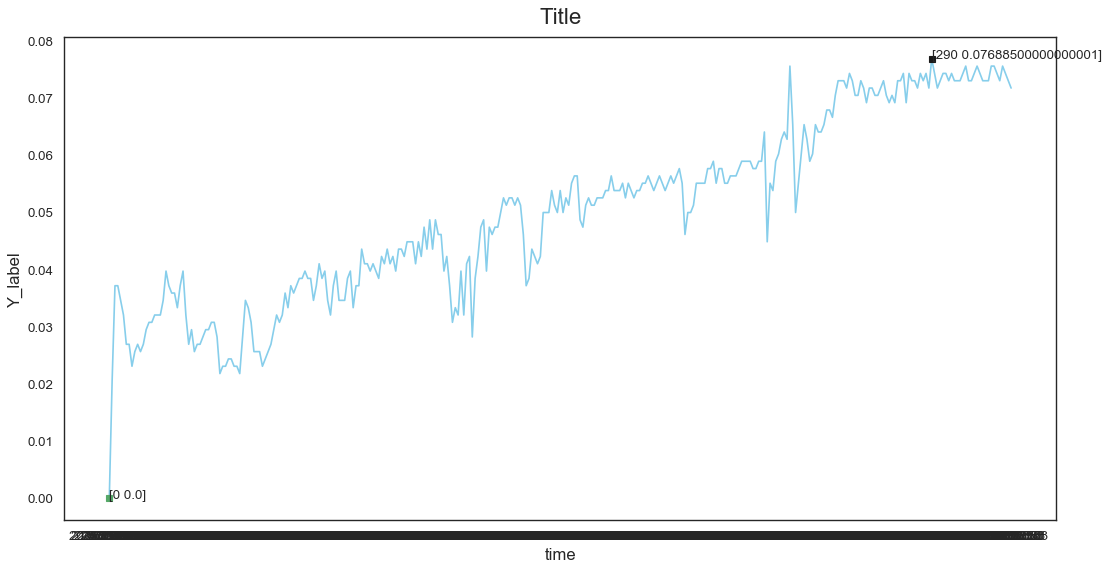

In [0]:
# loading and preparing data
df = pd.read_csv('EDA.csv')
event = df['tag']

# color labels setting 
color = ['skyblue', 'red', 'white']

# plot size setting
fig, ax = plt.subplots(figsize = (10,8), dpi=80)

# drawing Plot
plt.plot(df['time'],df['EDA'],color=color[0])
plt.axvline(event, c=color[1])

a = df['EDA']
#max value index
max_indx=np.argmax(round(a,2))
#min value index
min_indx=np.argmin(round(a,2))
plt.plot(max_indx,a[max_indx],'ks')

# mark max and min value in line
show_max='['+str(max_indx)+' '+str(a[max_indx])+']'
show_min='['+str(min_indx)+' '+str(a[min_indx])+']'
plt.annotate(show_max,xytext=(max_indx,a[max_indx]),xy=(max_indx,a[max_indx]))
plt.annotate(show_min,xytext=(min_indx,a[min_indx]),xy=(min_indx,a[min_indx]))
plt.plot(min_indx,a[min_indx],'gs')

# background setting 
sns.set(style=color[2])

# title and size
ax.set_title('Title',fontsize=20,pad = 12)

# x,y labels and size
plt.xlabel("time",fontsize=15)
plt.ylabel("Y_label",fontsize=15)

# x ticks setting
plt.xticks([])

# tick labels and size, rotation
plt.xticks(rotation=360,fontsize=12)
plt.yticks(fontsize=12)

# multi lines option: legend
#plt.legend(frameon=True)

# save plot as pdf file
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'timeseries.pdf', bbox_inches='tight')
# showing the image
plt.show()

### 2. Time Series with Peaks and Troughs Annotated

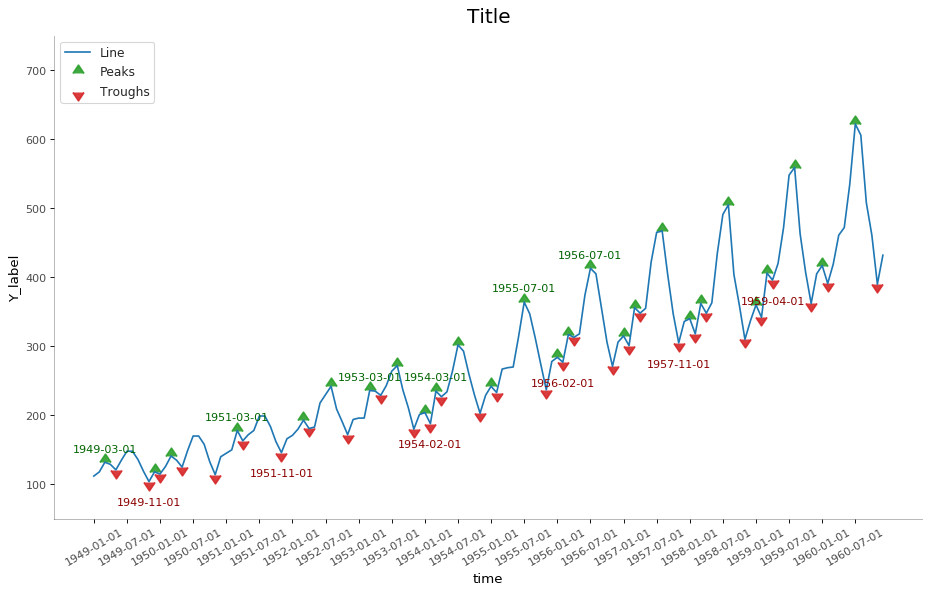

In [0]:
# loading and preparing data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# color labels setting 
color = ['tab:blue', 'tab:green', 'tab:red', 'darkgreen', 'darkred', 'white']

# getting the peaks and setting marks of peaks location
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1
# getting the troughs and setting marks of peaks location
doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# drawing plot
fig, ax = plt.subplots(figsize = (14,8), dpi=80)

plt.plot('date', 'value', data=df, color=color[0], label='Line')
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color=color[1], alpha=.9, s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color=color[2], alpha=.9, s=100, label='Troughs')

# annotates and its locations of peaks and troughs
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p]+15, df.date[p], horizontalalignment='center', color=color[3])
    plt.text(df.date[t], df.value[t]-35, df.date[t], horizontalalignment='center', color=color[4])

# background setting
sns.set(style=color[5])

# title and size
ax.set_title('Title',fontsize=18,pad = 12)

# x,y labels and size
plt.xlabel("time",fontsize=12)
plt.ylabel("Y_label",fontsize=12)

# x axis limit
plt.ylim(50,750)

# tick labels and location, size, rotation
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=30, fontsize=10, alpha=.7)
plt.yticks(fontsize=10, alpha=.7)

# lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)
# legend and position
plt.legend(loc='upper left')

# save plot as pdf file
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'timeseries_peaks.pdf', bbox_inches='tight')
# showing the image
plt.show()

### 3. Multiple Time Series

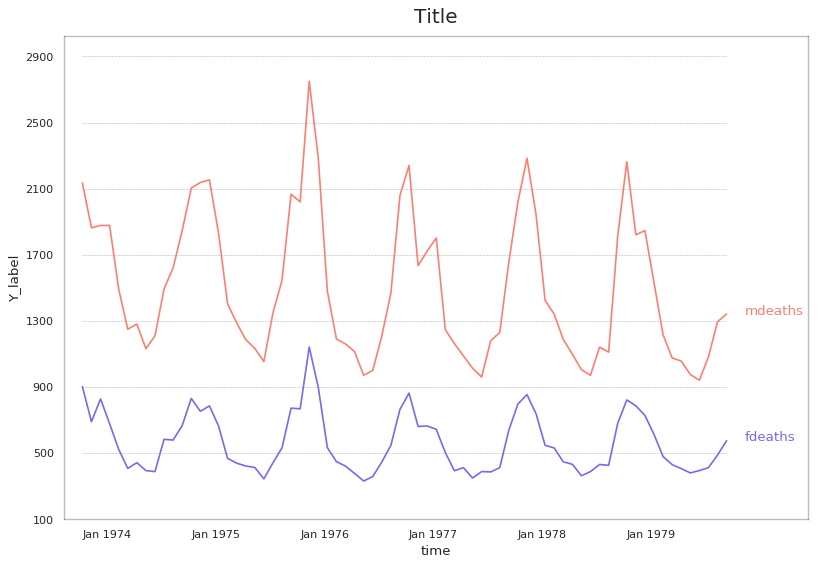

In [0]:
# loading and preparing data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

# define upper limit, lower limit, interval of Y axis
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400

# color labels setting 
color = ['salmon', 'mediumslateblue', 'darkturquoise', 'navagowhite'] 
color1 = ['black']

# drawing plot
fig, ax = plt.subplots(1,1,figsize=(12, 8), dpi= 80)    

# marking values on lines
columns = df.columns[1:]  
for i, column in enumerate(columns):
    plt.plot(df.date.values, df[column].values, lw=1.5, color=color[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=12, color=color[i])

# drawing tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors=color1[0], alpha=.3, linestyles="--", lw=0.5)    

# title and size
ax.set_title('Title',fontsize=18,pad = 12)

# x,y labels and size
plt.xlabel("time",fontsize=12)
plt.ylabel("Y_label",fontsize=12)

# tick labels and size, rotation
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=10)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=10, rotation=360)  

# x,y axis limit
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)

# lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

# save plot as pdf file
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'timeseries_multiple.pdf', bbox_inches='tight')
# showing the image
plt.show()

### 4. Time Series Decomposition Plot

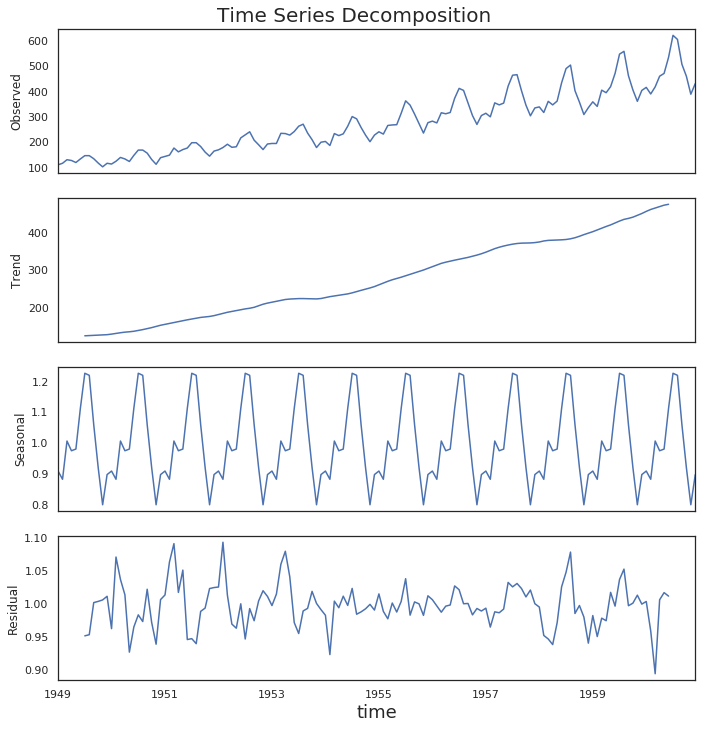

In [0]:
# loading and preparing data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

#color labels  setting 
color = ['white']  

# decompose
result = seasonal_decompose(df['value'], model='multiplicative')

# drawing plot and setting plot size
plt.rcParams.update({'figure.figsize': (10,10)})

# title and setting fixed space
result.plot().suptitle('Time Series Decomposition', fontsize=20)
plt.subplots_adjust(top=0.95)

# background setting
sns.set(style=color[0])

# x label
plt.xlabel("time",fontsize=18)

# save plot as pdf file
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'timeseries_decomposition.pdf', bbox_inches='tight')
# showing the image
plt.show()